<a href="https://colab.research.google.com/github/zuzanadostalova/Olympics-dataset-analysis/blob/main/EDA_summer_Olympics_since_1960.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All summer disciplines since 1960

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'
od.download(dataset_url)

In [ ]:
df = pd.read_csv("/content/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [ ]:
noc_country = pd.read_csv("/content/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [ ]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
df = df.merge(noc_country,
            left_on = 'NOC',
            right_on = 'NOC',
            how = 'left')

df

In [ ]:
df.loc[df['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [ ]:

df['Country'] = np.where(df['NOC']=='SGP', 'Singapore', df['Country'])
df['Country'] = np.where(df['NOC']=='ROT', 'Refugee Olympic Athletes', df['Country'])
df['Country'] = np.where(df['NOC']=='UNK', 'Unknown', df['Country'])
df['Country'] = np.where(df['NOC']=='TUV', 'Tuvalu', df['Country'])


# Put these values from Country into Team
df.drop('Team', axis = 1, inplace = True)
df.rename(columns = {'Country': 'Team'}, inplace = True)

In [ ]:
olympics_summer_subset = df.loc[(df['Year'] > 1960) & (df['Season'] == "Summer"), :]

In [ ]:
olympics_summer_subset = df.reset_index()


In [ ]:
olympics_summer_subset['Medal_Winner'] = np.where(olympics_summer_subset.loc[:,'Medal'] == 'DNW', 0, 1)

In [ ]:
olympics_summer_subset["NOC"].unique()

In [ ]:
olympics_summer_subset

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Medal_Winner
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,1
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,1
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,1
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,1
271112,271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,1
271113,271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,1
271114,271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,1


In [ ]:
df["BMI"] = df["Weight"] / ((df["Height"] / 100)** 2)
df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,23.959094


In [ ]:
olympics_summer_subset['Medal_Won'] = np.where(olympics_summer_subset.loc[:,'Medal'] == 'DNW', 0, 1)

In [ ]:
df['Medal']

0          NaN
1          NaN
2          NaN
3         Gold
4          NaN
          ... 
271111     NaN
271112     NaN
271113     NaN
271114     NaN
271115     NaN
Name: Medal, Length: 271116, dtype: object

In [ ]:
df['Medal'] = df['Medal'].replace(np.nan, 0)
df = df.replace(["Gold", "Silver", "Bronze"], 1)

In [ ]:
df['Medal']

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64

In [ ]:
df.info()

### Countries with more than one medal:

In [ ]:
df_more_medals = df[df['Medal'] >= 1]

Medals in Athletics per country:

In [ ]:
df_more_medals_ath = df_more_medals[df_more_medals["Sport"] == "Athletics"]
df_more_medals_ath_temp = df_more_medals_ath.groupby(['NOC']).sum()
df_more_medals_ath_sort = df_more_medals_ath_temp.sort_values(by = "Medal", ascending=False)
df_more_medals_ath_sort.head()

,ID,Age,Height,Weight,Year,Medal,BMI
NOC,,,,,,,
USA,69599214,26003.0,182684.0,75215.0,2112186,1080,23071.984242
GBR,21391735,8403.0,45409.0,17430.0,660158,338,5551.142531
URS,16493913,6226.0,42196.0,17865.0,477060,242,5629.683585
JAM,10010096,4018.0,27250.0,10408.0,311964,156,3347.275933
GER,10480851,3791.0,26839.0,11165.0,301416,154,3505.971183


In [ ]:
df_more_medals_swim = df_more_medals[df_more_medals["Sport"] == "Swimming"]
df_more_medals_swim_temp = df_more_medals_swim.groupby(['NOC']).sum()
df_more_medals_swim_sort = df_more_medals_swim_temp.sort_values(by = "Medal", ascending=False)
df_more_medals_swim_sort.head()

,ID,Age,Height,Weight,Year,Medal,BMI
NOC,,,,,,,
USA,73740242,22725.0,171217.0,68483.0,2132790,1078,20526.011414
AUS,27573696,8291.0,66582.0,25861.0,796342,401,7859.526921
GER,11921629,3284.0,21107.0,8335.0,307348,156,2460.888780
GDR,11749525,2808.0,26900.0,10272.0,300860,152,3265.441289
GBR,8010300,2670.0,14441.0,5183.0,248268,127,1599.332169


In [ ]:
df_more_medals_gymna = df_more_medals[df_more_medals["Sport"] == "Gymnastics"]
df_more_medals_gymna_temp = df_more_medals_gymna.groupby(['NOC']).sum()
df_more_medals_gymna_sort = df_more_medals_gymna_temp.sort_values(by = "Medal", ascending=False)
df_more_medals_gymna_sort.head()

,ID,Age,Height,Weight,Year,Medal,BMI
NOC,,,,,,,
URS,18991118,6759.0,38122.0,13323.0,566520,288,4933.051298
USA,12296024,4109.0,20649.0,6032.0,381952,194,2451.058607
JPN,13586821,4219.0,25805.0,9149.0,328248,166,3471.681955
ROU,9216483,2394.0,18392.0,5283.0,268604,135,2189.129820
NOR,7564684,2974.0,342.0,86.0,231312,121,30.110991


Top winning countries all disciplines:

In [ ]:
df_more_medals_temp = df_more_medals.groupby(['NOC']).sum()

In [ ]:
df_most_medals_all_discipl = df_more_medals_temp.sort_values(by = "Medal", ascending=False)
df_most_medals_all_discipl.head()

,ID,Age,Height,Weight,Year,Medal,BMI
NOC,,,,,,,
USA,373469646,139222.0,825253.0,331681.0,11100460,5637,101106.498956
URS,184489176,63248.0,402651.0,169431.0,4936928,2503,53361.694488
GER,155107663,56320.0,294469.0,121086.0,4277166,2165,37257.844363
GBR,134658960,54718.0,191087.0,82604.0,4035792,2068,23822.123355
FRA,101131658,47038.0,187343.0,73937.0,3476468,1777,22752.849127


In [ ]:
df_most_medals_all_discipl = df_most_medals_all_discipl.reset_index()

### Plotting:

Plotting the BMI of five countries with the highest number of medals:

In [ ]:
top_5_df = df[df["NOC"].isin(["USA", "URS", "GER", "GBR", "FRA"])]

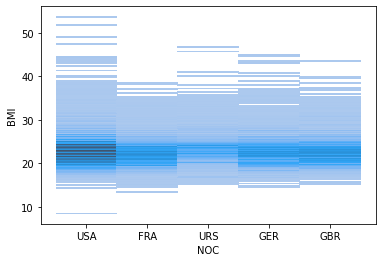

In [ ]:
import seaborn as sns
sns.histplot(top_5_df, x="NOC", y="BMI")

Most medals per country all disciplines:

In [ ]:
df_most_medals_top_5 = df_most_medals_all_discipl[:5]
df_most_medals_top_5.reset_index()

,index,NOC,ID,Age,Height,Weight,Year,Medal,BMI
0,0,USA,373469646,139222.0,825253.0,331681.0,11100460,5637,101106.498956
1,1,URS,184489176,63248.0,402651.0,169431.0,4936928,2503,53361.694488
2,2,GER,155107663,56320.0,294469.0,121086.0,4277166,2165,37257.844363
3,3,GBR,134658960,54718.0,191087.0,82604.0,4035792,2068,23822.123355
4,4,FRA,101131658,47038.0,187343.0,73937.0,3476468,1777,22752.849127


In [ ]:
import plotly.express as px
fig_all = px.bar(df_most_medals_top_5, x='NOC', y='Medal')
fig_all.show()

Most medals per country Athletics:

In [ ]:
df_top_5_atl = df_more_medals_ath_sort[:5]

In [ ]:
df_top_5_atl = df_top_5_atl.reset_index()

In [ ]:
fig_atl = px.bar(df_top_5_atl, x='NOC', y='Medal')
fig_atl.show() 

Most medals per country Swimming:

In [ ]:
df_more_medals_swim_sort = df_more_medals_swim_sort.reset_index()

In [ ]:
df_top_5_swim = df_more_medals_swim_sort[:5]

In [ ]:
fig_sw = px.bar(df_top_5_swim, x='NOC', y='Medal')
fig_sw.show() 

Most medals per country Gymnastics:

In [ ]:
df_more_medals_gymna_sort = df_more_medals_gymna_sort.reset_index()

In [ ]:
df_top_5_gymn = df_more_medals_gymna_sort[:5]

In [ ]:
fig_gymn = px.bar(df_top_5_gymn, x='NOC', y='Medal')
fig_gymn.show() 